## spam or  ham classifier


In [1]:
import numpy as np
import pandas as pd


In [2]:
# pip install chardet

In [3]:
import chardet
with open('spam.csv', 'rb') as f:
    result = chardet.detect(f.read())

encoding = result['encoding']
print(f"Detected encoding: {encoding}")


Detected encoding: Windows-1252


In [4]:
df = pd.read_csv('spam.csv', encoding=encoding)


In [5]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [6]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2201,ham,A boy was late 2 home. His father: \POWER OF F...,NaN,NaN,NaN
1802,ham,Ok lor thanx... ÌÏ in school?,NaN,NaN,NaN
145,ham,Whats the staff name who is taking class for us?,NaN,NaN,NaN
1856,ham,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ...",NaN,NaN,NaN
3743,ham,Nobody names their penis a girls name this sto...,NaN,NaN,NaN


## data cleaning

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [8]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [9]:
df.sample(5)

,v1,v2
4677,ham,It is a good thing I'm now getting the connect...
3081,ham,"And very importantly, all we discuss is betwee..."
1275,ham,Wot u up 2 u weirdo?
1220,spam,No. 1 Nokia Tone 4 ur mob every week! Just txt...
1667,ham,So now my dad is gonna call after he gets out ...


In [10]:
df.rename(columns={'v1':'target','v2':'text'},inplace=True)

In [11]:
df.sample(5)

,target,text
5157,ham,K k:) sms chat with me.
3641,ham,My house here e sky quite dark liao... If rain...
4222,ham,Stupid auto correct on my phone
4602,ham,And I don't plan on staying the night but I pr...
3416,ham,But i haf enuff space got like 4 mb...


In [12]:
!pip install scikit-learn

In [13]:
from sklearn.preprocessing import LabelEncoder

In [14]:
encoder=LabelEncoder()

In [15]:
df['target'] = encoder.fit_transform(df['target'])

In [16]:
df

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."
...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...
5568,0,Will Ì_ b going to esplanade fr home?
5569,0,"Pity, * was in mood for that. So...any other s..."
5570,0,The guy did some bitching but I acted like i'd...


In [17]:
df.isnull().sum()

# no null value is present in the dataset

target    0
text      0
dtype: int64

In [18]:
df.duplicated().sum()

403

In [19]:
# drop duplicates
df = df.drop_duplicates(keep='first')

In [20]:
df.duplicated().sum()

0

In [21]:
df.shape

(5169, 2)

## EDA

In [22]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

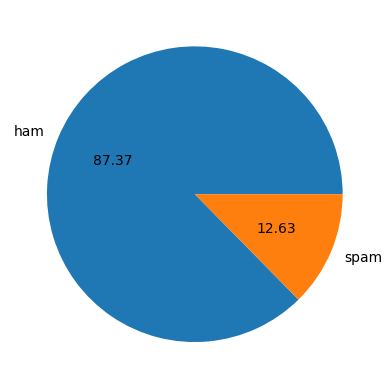

In [23]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

### data is imbalanced

### for further eda we have to count the number of words , number of character and number of sentences

### for this we have to install nltk(natural language tool kit)


In [24]:
# pip install nltk

In [25]:
import nltk

In [26]:
nltk.download('punkt')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [27]:
# to claculate the number of characters
df['num_characters']=df['text'].apply(len)


C:\Users\acer\AppData\Local\Temp\ipykernel_7720\2108910662.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_characters']=df['text'].apply(len)


In [28]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [29]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [30]:
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [31]:
# to count numbers of words we have to use lambda function
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

C:\Users\acer\AppData\Local\Temp\ipykernel_7720\587706601.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))


In [32]:
df.head()

,target,text,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [33]:
df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

C:\Users\acer\AppData\Local\Temp\ipykernel_7720\1110724051.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['num_sent'] = df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))


In [34]:
df[['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [35]:
# for only ham messsages 

df[df['target']==0][['num_characters','num_words','num_sent']].describe()


,num_characters,num_words,num_sent
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [36]:
# for spam messages 

df[df['target']==1][['num_characters','num_words','num_sent']].describe()

,num_characters,num_words,num_sent
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [37]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


In [45]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

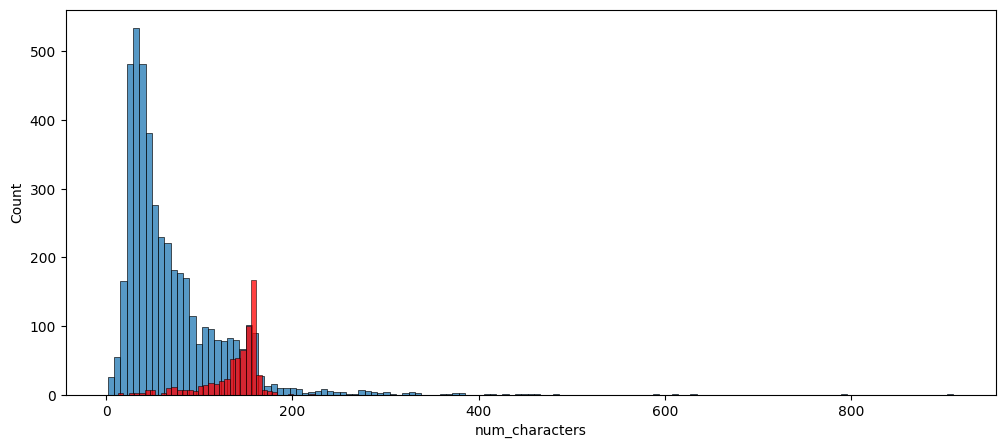

In [46]:
plt.figure(figsize=(12,5))
sns.histplot(df[df['target']==0]['num_characters'])

sns.histplot(df[df['target']==1]['num_characters'],color='red')



<Axes: >

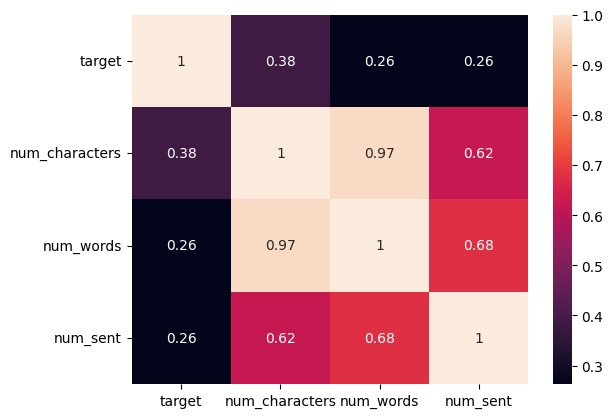

In [47]:
sns.heatmap(df[['target','num_characters','num_words','num_sent']].corr(),annot=True)

## data preprocessing
 ### - Lowercase
 ### - Tokenization
 ### - removing special characters
 ### - removing stop words or punctuation
 ### - stemming --> eg. dancing,danced ,dance convert all into dance

In [48]:
# pip install nltk

In [49]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\acer\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [50]:
import string

In [53]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()

In [51]:
from string import capwords , punctuation
from nltk.corpus import stopwords

def transform_text(text):
    text=text.lower()
    text = nltk.word_tokenize(text)
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
    
    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))

    return " ".join(y)

In [55]:
transform_text('did you like my presentation on machine learning ?')

'like present machin learn'

In [56]:
#removing stopwords
# nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')


['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [57]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [58]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
ps.stem('refusing')

'refus'

In [59]:
# now applying transform_text function on the text column
df['transfomed_text'] = df['text'].apply(transform_text)

C:\Users\acer\AppData\Local\Temp\ipykernel_7720\240202640.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['transfomed_text'] = df['text'].apply(transform_text)


In [60]:
df.head()


,target,text,num_characters,num_words,num_sent,transfomed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


In [61]:
# pip install wordcloud

In [62]:
from wordcloud import WordCloud
wc = WordCloud(width=400,height=400,min_font_size=4,background_color='black')

In [63]:
spam_wc = wc.generate(df[df['target']==1]['transfomed_text'].str.cat(sep=" "))

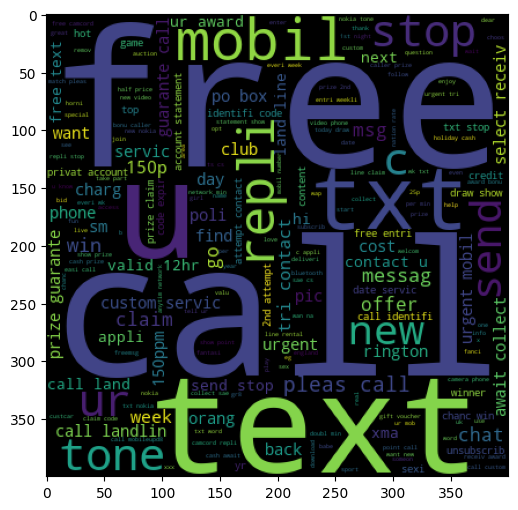

In [64]:
plt.figure(figsize=(12,6))
plt.imshow(spam_wc)

In [65]:
ham_wc = wc.generate(df[df['target']==0]['transfomed_text'].str.cat(sep=" "))

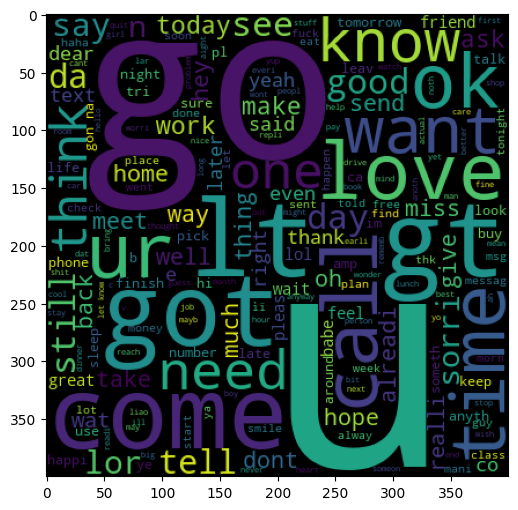

In [66]:
plt.figure(figsize=(12,6))

plt.imshow(ham_wc)

In [67]:
df.head(4)

,target,text,num_characters,num_words,num_sent,transfomed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say


In [68]:
spam_corpus = []
for msg in df[df['target']==1]['transfomed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [69]:
len(spam_corpus)

9939

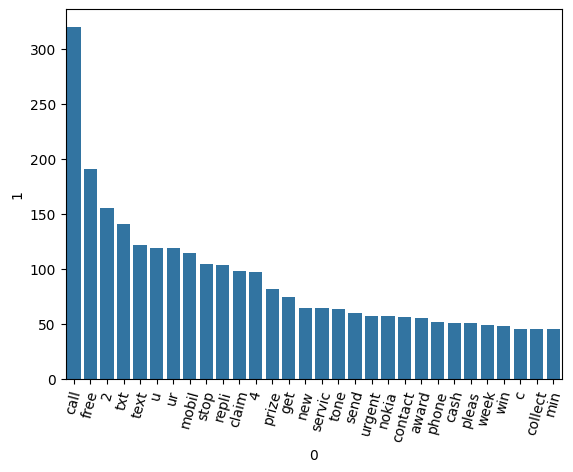

In [70]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(spam_corpus).most_common(30))[0],y=pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation=75)
plt.show()

In [71]:
ham_corpus = []
for msg in df[df['target']==0]['transfomed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [72]:
len(ham_corpus)

35404

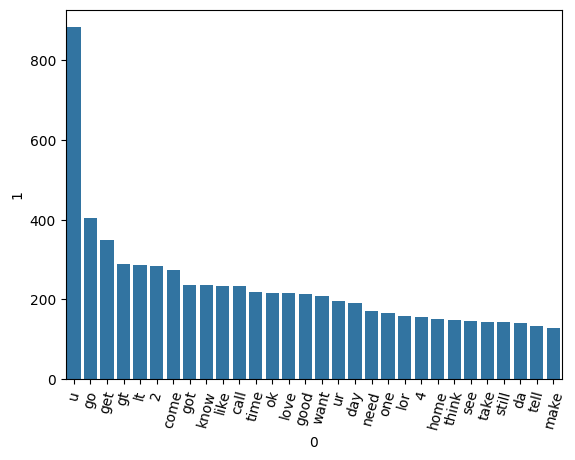

In [73]:
from collections import Counter
sns.barplot(x=pd.DataFrame(Counter(ham_corpus).most_common(30))[0],y=pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation=75)
plt.show()

# MODEL BUILDING

In [74]:
df1 = df

In [76]:
df

,target,text,num_characters,num_words,num_sent,transfomed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though
...,...,...,...,...,...,...
5567,1,This is the 2nd time we have tried 2 contact u...,161,35,4,2nd time tri 2 contact u pound prize 2 claim e...
5568,0,Will Ì_ b going to esplanade fr home?,37,9,1,b go esplanad fr home
5569,0,"Pity, * was in mood for that. So...any other s...",57,15,2,piti mood suggest
5570,0,The guy did some bitching but I acted like i'd...,125,27,1,guy bitch act like interest buy someth els nex...


In [66]:
# pd.get_dummies(df1,columns=['target'])

In [77]:
from sklearn.feature_extraction.text import CountVectorizer , TfidfVectorizer
cv = CountVectorizer()

In [78]:
tfidf = TfidfVectorizer(max_features=3000)

In [79]:
X = tfidf.fit_transform(df['transfomed_text']).toarray()

In [80]:
X.shape

(5169, 3000)

In [81]:
y = df['target'].values

In [82]:
y.shape



(5169,)

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train,X_test,y_train ,y_test = train_test_split(X,y,test_size=0.2,random_state=2)

In [85]:
from sklearn.naive_bayes import MultinomialNB,GaussianNB,BernoulliNB

In [86]:
from sklearn.metrics import confusion_matrix,accuracy_score,precision_score

In [87]:
mnb = MultinomialNB()
gnb = GaussianNB()
bnb = BernoulliNB()

In [88]:
gnb.fit(X_train,y_train)
y_pred1 = gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))


0.8694390715667312
[[788 108]
 [ 27 111]]
0.5068493150684932


In [89]:
mnb.fit(X_train,y_train)
y_pred2 = mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9709864603481625
[[896   0]
 [ 30 108]]
1.0


In [90]:
bnb.fit(X_train,y_train)
y_pred3 = bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9835589941972921
[[895   1]
 [ 16 122]]
0.991869918699187


In [153]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

In [154]:
# import sys
# !{sys.executable} -m pip install xgboost

In [155]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
xgb = XGBClassifier(n_estimators=50,random_state=2)

In [156]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
    'xgb':xgb
}

In [157]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [158]:
train_classifier(svc,X_train,y_train,X_test,y_test)

(0.9758220502901354, 0.9747899159663865)

In [160]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train,y_train,X_test,y_test)
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.9758220502901354
Precision -  0.9747899159663865
For  KN
Accuracy -  0.9052224371373307
Precision -  1.0
For  NB
Accuracy -  0.9709864603481625
Precision -  1.0
For  DT
Accuracy -  0.9274661508704062
Precision -  0.8118811881188119
For  LR
Accuracy -  0.9584139264990329
Precision -  0.9702970297029703
For  RF
Accuracy -  0.9758220502901354
Precision -  0.9829059829059829


C:\Users\acer\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.960348162475822
Precision -  0.9292035398230089
For  BgC
Accuracy -  0.9584139264990329
Precision -  0.8682170542635659
For  ETC
Accuracy -  0.9748549323017408
Precision -  0.9745762711864406
For  GBDT
Accuracy -  0.9468085106382979
Precision -  0.9191919191919192
For  xgb
Accuracy -  0.9671179883945842
Precision -  0.9262295081967213


In [136]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)


In [137]:
performance_df

,Algorithm,Accuracy,Precision
1,KN,0.900387,1.000000
2,NB,0.959381,1.000000
5,RF,0.971954,1.000000
8,ETC,0.972921,0.982456
0,SVC,0.972921,0.974138
6,AdaBoost,0.961315,0.945455
10,xgb,0.972921,0.943548
4,LR,0.951644,0.940000
9,GBDT,0.952611,0.923810
7,BgC,0.958414,0.862595


In [138]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [139]:
performance_df1

,Algorithm,variable,value
0,KN,Accuracy,0.900387
1,NB,Accuracy,0.959381
2,RF,Accuracy,0.971954
3,ETC,Accuracy,0.972921
4,SVC,Accuracy,0.972921
5,AdaBoost,Accuracy,0.961315
6,xgb,Accuracy,0.972921
7,LR,Accuracy,0.951644
8,GBDT,Accuracy,0.952611
9,BgC,Accuracy,0.958414


In [109]:
# model improvment after changing max_features parameter

In [161]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)


In [111]:
# temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)


In [163]:
new_df = performance_df.merge(temp_df,on='Algorithm')
new_df

,Algorithm,Accuracy,Precision,Accuracy_max_ft_3000,Precision_max_ft_3000
0,KN,0.900387,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217


In [113]:
# new_df_scaled = new_df.merge(temp_df,on='Algorithm')


In [114]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)


In [115]:
new_df_scaled.merge(temp_df,on='Algorithm')


,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,KN,0.900387,1.000000,0.905222,1.000000,0.905222,1.000000,0.905222,1.000000
1,NB,0.959381,1.000000,0.970986,1.000000,0.970986,1.000000,0.970986,1.000000
2,RF,0.971954,1.000000,0.975822,0.982906,0.975822,0.982906,0.975822,0.982906
3,ETC,0.972921,0.982456,0.974855,0.974576,0.974855,0.974576,0.974855,0.974576
4,SVC,0.972921,0.974138,0.975822,0.974790,0.975822,0.974790,0.975822,0.974790
5,AdaBoost,0.961315,0.945455,0.960348,0.929204,0.960348,0.929204,0.960348,0.929204
6,xgb,0.972921,0.943548,0.967118,0.926230,0.967118,0.926230,0.967118,0.926230
7,LR,0.951644,0.940000,0.958414,0.970297,0.958414,0.970297,0.958414,0.970297
8,GBDT,0.952611,0.923810,0.946809,0.919192,0.946809,0.919192,0.946809,0.919192
9,BgC,0.958414,0.862595,0.958414,0.868217,0.958414,0.868217,0.958414,0.868217


In [164]:
# Voting Classifier
svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
mnb = MultinomialNB()
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

from sklearn.ensemble import VotingClassifier

In [165]:
voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [166]:
voting.fit(X_train,y_train)


VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('et',
                              ExtraTreesClassifier(n_estimators=50,
                                                   random_state=2))],
                 voting='soft')

In [167]:
y_pred = voting.predict(X_test)
print("Accuracy",accuracy_score(y_test,y_pred))
print("Precision",precision_score(y_test,y_pred))

Accuracy 0.9816247582205029
Precision 0.9917355371900827


In [91]:
import pickle
pickle.dump(tfidf,open('vectorizer1.pkl','wb'))
pickle.dump(mnb,open('model1.pkl','wb'))